<a href="https://colab.research.google.com/github/neninur0961/4212301008_Neni-Nur_VLM/blob/main/vlm_license_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Language Model untuk Deteksi Plat Nomor Kendaraan

Notebook ini mendemonstrasikan penggunaan Vision Language Model (VLM) untuk mendeteksi dan membaca plat nomor kendaraan.

**Tujuan Pembelajaran:**
1. Memahami konsep Vision Language Model
2. Implementasi VLM menggunakan model pre-trained
3. Aplikasi praktis dalam deteksi plat nomor

## 1. Instalasi Library

In [ ]:
# Install library yang diperlukan
!pip install transformers pillow torch torchvision -q
!pip install accelerate -q

## 2. Import Library

In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from PIL import Image
import requests
from io import BytesIO
import torch

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Menggunakan device: {device}")

Menggunakan device: cuda


## 3. Load Model VLM

Kita akan menggunakan BLIP-2 (Bootstrapping Language-Image Pre-training) untuk aplikasi OCR.

In [ ]:
# Load model dan processor
print("Loading model BLIP-2...")

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b",
    torch_dtype=torch.float16  # Untuk efisiensi memory
)
model = model.to(device)

print("Model berhasil di-load!")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading model BLIP-2...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

Model berhasil di-load!


## 4. Fungsi Helper untuk Load Gambar

In [ ]:
def load_image_from_file(filepath):
    """Load gambar dari file lokal"""
    img = Image.open(filepath)
    return img.convert('RGB')

def display_image(image):
    """Tampilkan gambar"""
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## 5. Fungsi Deteksi Plat Nomor dengan VLM

In [ ]:
def detect_license_plate(image, prompt=None):
    """
    Deteksi dan ekstraksi informasi plat nomor menggunakan VLM

    Args:
        image: PIL Image object
        prompt: Text prompt untuk guide model (optional)

    Returns:
        str: Deskripsi atau teks plat nomor yang terdeteksi
    """
    # Jika ada prompt spesifik, gunakan conditional generation
    if prompt:
        inputs = processor(image, text=prompt, return_tensors="pt").to(device)
    else:
        # Unconditional image captioning
        inputs = processor(image, return_tensors="pt").to(device)

    # Generate output
    with torch.no_grad():
        output = model.generate(**inputs, max_length=50)

    # Decode output
    caption = processor.decode(output[0], skip_special_tokens=True)

    return caption

## 6. Contoh Penggunaan - Image Captioning Umum (Tanpa Prompt)

Loading gambar...

Menampilkan gambar:


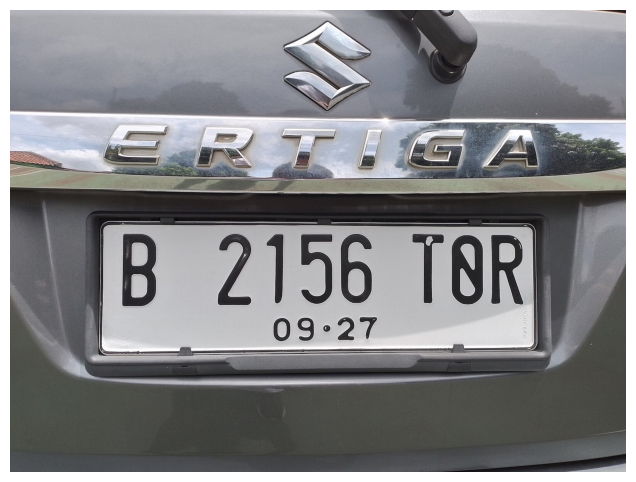


Melakukan deteksi
Hasil: suzuki b2 125 tor



In [ ]:
print("Loading gambar...")
image = load_image_from_file("./sample_license_plate_1.jpg")

print("\nMenampilkan gambar:")
display_image(image)

print("\nMelakukan deteksi")
result = detect_license_plate(image)
print(f"Hasil: {result}")

## 7. Contoh dengan Prompt Spesifik Untuk Rekognisi Nomor Plat Kendaaraan

In [ ]:
# Menggunakan prompt tertentu sebagai input model
# Gunakan opsi prompt lain dan bandingkan hasilnya
prompts = [
    "Question: What is the license plate number? Answer:",
    "Question: What is the license plate character in the image? Answer:",
]

print("Test prompt:\n")
for prompt in prompts:
    result = detect_license_plate(image, prompt=prompt)
    print(f"Prompt: '{prompt}'")
    print(f"Hasil: {result}")
    print("-" * 50)

Test prompt:

Prompt: 'Question: What is the license plate number? Answer:'
Hasil: Question: What is the license plate number? Answer: b2-25-t
--------------------------------------------------
Prompt: 'Question: What is the license plate character in the image? Answer:'
Hasil: Question: What is the license plate character in the image? Answer: b2 125
--------------------------------------------------


## 8. Measure Performance
Lakukan percobaan dengan mengupload 20 gambar sample license plate number dan lakukan pengukuran terhadap metrik CER. Lengkapi script di atas agar dapat mengukur nilai CER dari plat nomor yang ada pada gambar.

In [ ]:
# Fungsi untuk mengkalkukasi CER
def measure_cer(actual_text, predictec_text):
  '''lengkapi source code berikut'''
  return cer

# Fungsi untuk mengkalkulasi rata-rata CER dari 20 gambar yang diupload
def calc_avg_cer():
  return avg_cer

## 9. Evaluasi dan Diskusi

### Pertanyaan untuk Mahasiswa:

1. **Berapa CER terbaik yang dihasilkan dari hasil pengujian?**

2. **Prompt mana yang memberikan hasil terbaik?**

3. **Apa keterbatasan pendekatan VLM untuk tugas ini?**

4. **Apa ide Anda untuk meningkatkan performa dari OCR menggunakan VLMs?**

## Referensi

1. Li, J., et al. (2022). "BLIP: Bootstrapping Language-Image Pre-training"
2. Salesforce BLIP: https://github.com/salesforce/BLIP
3. Hugging Face Transformers: https://huggingface.co/transformers/

---